# 5. Conclusion

Congratulations for having completed this course. As a reminder, we have covered the following:
- How Reinforcement Learning and sequential combinatorial problems work at a high level (notebook 1)
- Implementation of a foundational Reinforcement Learning algorithm, **Tabular Q-Learning**, from scratch
- Visualising training results and performing automated **hyperparameter tuning**
- Modelling your own custom environment using the Gymnasium API, allowing you to define any problem space you are working with in a manner that any RL algorithm can solve

Before concluding, there are a few things worth mentioning, specifically in terms of how you can continue your learning beyond what has been covered in this introductory course, and a few things that we can expand on now that you have gained all prerequisite foundational knowledge. Resources and concepts mentioned here are largely provided for reference rather than expecting for you to quickly attain knowledge of all these concepts at once.

## Reinforcement Learning Algorithms Beyond the Tabular Setting

In this course, we only implemented Tabular Q-Learning, which is a **tabular** algorithm.

There are lots of different settings in Reinforcement Learning, that demand using different approaches:
- Online / Offline
    - **Offline RL** learns solely from a fixed data set of transitions and rewards — for example, production logs or expert demonstrations,because online exploration is impossible, unsafe, or too costly
    - Online RL learns in the real environment or a simulation, but as aforementioned, it's not always feasible to create a faithful representation of a real environment as a simulation (e.g. where complex physical laws need to be captured)
    - Offline Reinforcement Learning is a vastly different setting, since exploration isn't possible, and resolves to dealing with counterfactual reasoning problems ("what if action Y instead of X" was taken here). It is easily susceptible to out-of-distribution and extrapolation errors. See [Liu et al, 2023](https://proceedings.neurips.cc/paper_files/paper/2023/file/121db870b0470dd63bb5bc59c724275a-Paper-Conference.pdf) and [Kumar et al, 2020](https://arxiv.org/pdf/2006.04779) for further reading. 
- Continuous / Discrete
    - Both an action space and state space can either be *discrete* or *continuous*
    - **Discrete** means the set of possible states or actions can be counted exactly (e.g. the three doors to choose between in Monty Hall)
    - **Continuous** spaces contain infinitely many values—representing an action might require specifying a real‑valued vector such as wheel velocities, steering angles, or joint torques.
    - Our Tabular Q-Learning implementation only handles discrete action spaces and discrete state spaces.
    - As an extension, you may want to consider implementing **Deep Q‑Network (DQN)** for high‑dimensional visual observations ([Mnih et al., 2013](https://arxiv.org/abs/1312.5602)), while **Deep Deterministic Policy Gradient (DDPG)** and its successors handle continuous actions ([Lillicrap et al., 2015](https://arxiv.org/abs/1509.02971)).
- Single-agent / Multi-agent
    - In **multi‑agent** RL several agents learn simultaneously. Their objectives may be cooperative, competitive, or mixed‑sum. Training can be centralised (a single learner observes the joint state) or decentralised, and explicit inter‑agent communication may be permitted.
    - For example, consider warehouse robot fleets, which is an example of a multi-agent combinatorial sequential decision problem.
- Finite time-horizon (Episodic RL) / Infinite time horizon
    - Episodic environments terminate after a finite number of steps, while continuous (infinite-horizon) tasks run indefinitely.
    - Regardless, continuous  tasks are typically trained by either bootstrapping with a discount factor $\gamma$ < 1 or by truncating rollouts to a manageable length so that the (infinite) return remains finite ([Sutton & Barto, 2018](http://incompleteideas.net/book/the-book-2nd.html)).

Generally, Reinforcement Learning *methods* can be split into the following:
- On-policy / Off-policy
    - **On-policy** (e.g. SARSA, PPO) learns only from trajectories sampled from the current policy, whereas **off-policy** (e.g. Q-learning, DDPG, SAC) can reuse past or externally generated data. 
    - On-policy RL is considered more stable, whereas off-policy RL has the potential to be more sample efficient (requiring less experiences to learn from).
- Value-based / Policy-based
    - **Value‑based** methods involve the agent first learning a *value function* — a prediction of the long‑term reward for each action in every state. When it has to act, it usually chooses the action with the highest predicted value (adding a little randomness during learning, e.g. $\varepsilon$‑greedy). Classic algorithms include: Q‑Learning, Deep Q‑Network (DQN).
    -  **Policy‑based** methods have the agent skipping learning value function and learns the *policy itself* instead — a set of probabilities for choosing each action. Those probabilities are adjusted by **policy‑gradient** methods: actions that paid off become more likely. This adjustment is simply ***gradient ascent*** on the expected reward (think of repeatedly nudging the policy parameters in the direction that raises the score). Popular algorithms include PPO, A3C and REINFORCE.
        - Since in Notebook 2, we implemented Tabular Q-Learning which is value-based, you might want to consider implementing **REINFORCE** as a gentler practical introduction to policy-based RL. For further details, see [Williams, 1992](https://link.springer.com/article/10.1007/BF00992696) and page 328 of [Sutton & Barto, 2018](http://incompleteideas.net/book/the-book-2nd.html). 
    - **Actor–critic** methods are hybrids which combine both: a policy (actor) chooses actions while a value function (critic) supplies low‑variance learning signals.
- Model-based / Model-free
    - **Model‑free RL** (e.g., Tabular Q‑Learning, PPO, SAC) directly optimises a policy or value function from experience, without learning an explicit dynamics model.
    – **Model‑based RL** learns (or is provided) a predictive model of the environment’s dynamics and reward, enabling planning for multiple timesteps ahead with imagined rollouts. Notable examples include **MuZero** ([Schrittwieser et al., 2020](https://www.nature.com/articles/s41586-020-03051-4)) and **DreamerV3** ([Hafner et al., 2023](https://arxiv.org/abs/2301.04104)), which achieve strong sample efficiency on many standard benchmarks.

### High-Level Overview of RL Algorithms

The following diagram provides a high-level overview of Reinforcement Learning algorithms, derivative of Chapter 2 of the [Spinning Up book by OpenAI](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html). This mindmap is by no means exhaustive, and could be further split into on-policy and off-policy algorithms, which would also make an interesting exercise! Some other algorithms cannot be easily categorised, such as Decision Transformers, and not to mention, offline RL algorithms are not mentioned here, nor imitation learning (learning from expert demonstrations).

<p align="center">
  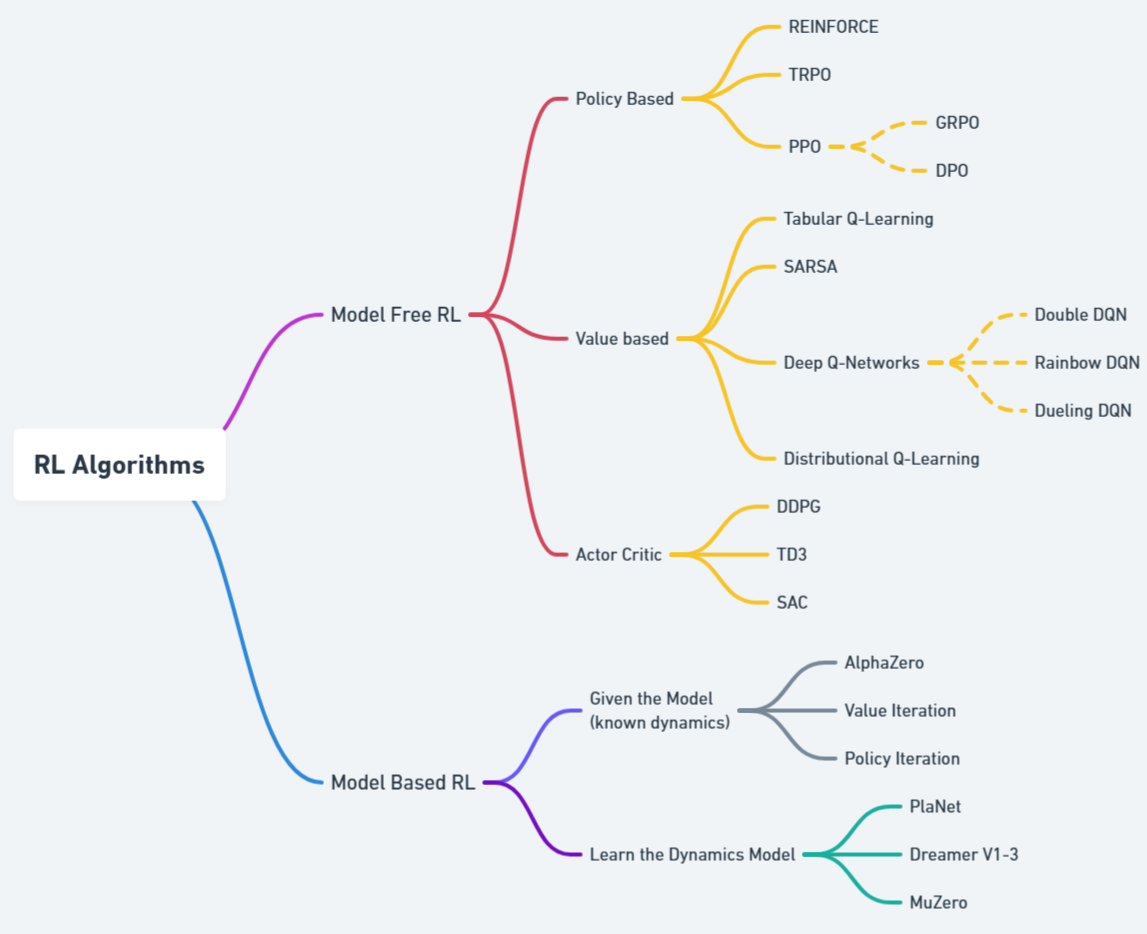
</p>

## Scaling to Large, High-Dimensional State and Action Spaces

Combinatorial problems involve an exponential blow-up in terms of the number of states and actions that can be considered. In general, navigating this is an open research problem, but there are still solutions that can be applied in practice, which will be detailed below.

### Abstraction

#### State Space

Sometimes, states of a MDP are equivalent, such that **symmetry reduction** techniques can be applied. For example, consider the problem of *load balancing* (distributing compute workloads between servers) might involve exactly two identical jobs queued with two identical servers, which is reducible to 1 state instead of 2 — since the two states are said to be *indistinguishable*. Also, it is possible to directly reduce the size of the state space, e.g. through a technique known as *Bisimulation Quotienting* ([Drakulic et al, 2023](https://arxiv.org/pdf/2301.03313)).

**Relational Reinforcement Learning (RRL)** pushes symmetry reasoning into first‑order logic: instead of enumerating every concrete state, the agent thinks in predicates such as `On(block, support)` or `At(truck, depot)` and learns policies parameterised by object variables.  Lifted Q‑Learning, graph‑attention networks over predicate graphs, and other neuro‑symbolic hybrids let one compact policy scale from a two‑truck routing toy to a city‑wide fleet, so long as the relational schema is unchanged.  The catch is that those elegant, lifted rules still have to be **grounded** against the real objects at decision time, so action selection can balloon to exponential-time matching problems, and small errors in predicate recognition can poison many instantiations at once.  Moreover, crafting or learning the right predicate vocabulary remains tricky: if key relations are missing or overly abstract, the promised generalisation evaporates, leaving you with the cost of symbolic reasoning but little of the payoff.

**State abstractions** can be learnt, such as through bisimulation metrics or causality-based methods, based on preserving reward relevant distinctions. Training happens in a latent (abstract) space which is much smaller than the real space. For example, see [Liu et al., 2024](https://arxiv.org/pdf/2405.03864).

**Graph neural networks** (GNNs) provide a compact, **permutation‑equivariant** way to embed MDP states that are most naturally described as graphs — think vehicle‑routing, molecule manipulation or multi‑robot coordination. By iteratively aggregating information along edges, a GNN encodes every node into a fixed-size vector whose dimensionality is set by the network architecture, *not* by the number of nodes in the problem instance. This yields an *instance‑size–independent* state representation that emphasises the *relational* structure most relevant for decision‑making [Darvariu et al., 2024](https://arxiv.org/html/2404.06492v2).

#### Action Space
For example, large discrete action spaces can be handled by Stochastic Q-Learning ([Fourati et. al., 2024](https://arxiv.org/abs/2405.10310), avoids scanning the entire action set at every step and instead draws upon a smaller random handful of actions each step, picking the best one from that subset. Despite making such a change, convergence guarantees are upheld, because a new subset is drawn every step. This immensely contributes to tractability.

Additionally, a multi-dimensional action can be **factorised** into components, instead of considering each joint action. A shared state encoder is followed by multiple action branches, one for each action dimension. This approach is named as a **Branching Dueling Q-Network (BDQ)**, proposed by [Tavakoli et al. (2018)](https://arxiv.org/abs/1711.08946).

**Embeddings** of actions can also be considered for actions that have some structure or can be described by features to generalize value estimates across similar actions, for example, see [Dulac-Arnold et al. (2015)](https://arxiv.org/abs/1512.07679).

Another option is considering **options**, which are macro-actions. These are *temporally-extended actions*, where sequences of actions can be considered rather than individual actions, which reduces the number of actions that has to be considered. Some emerging methods discover these options automatically, for example see [Bacon et al., 2016](https://arxiv.org/abs/1609.05140).

#### Hierarchy and Decomposition
> Let a coarse policy break the exponentially growing action/state space into bite-sized sub-goals, and let specialised policies master those.

**Hierarchical Reinforcement Learning (HRL)** spreads work across several policies, and works as follows:
1. A high‑level meta‑controller operates on an abstract, slow‑moving representation and periodically outputs a sub‑goal $g$ instead of a primitive action.
2. A low‑level specialist is conditioned on $(s, g)$ and need only optimise behaviour inside that much smaller goal‑centred space.

This "divide-and-conquer" reduces sample complexity, makes policies reusable, and lets you mix different learning schemes (model-free, model-based, heuristic) under one roof. This actually considered a form of **decision abstraction**.

However, it requires that your problem has tasks that are decomposable, but if it can, training sub-policies that deal with specific goals is far simpler to do. For multi-task generalisation more broadly, even if the task is not decomposable, you may want to consider **Goal-Conditioned Reinforcement Learning** (GCRL), see [Liu et al, 2022](https://arxiv.org/abs/2201.08299).

An example this could be applied to:
> A fleet of $K$ vehicles must serve $N$ customers that each have a service time‑window $[e_i,\,l_i]$. The environment is *sequential*: at every decision step a vehicle chooses its next customer (or to return to the depot), travel times may change with real‑time traffic, and new requests can pop up while routes are already under way.

<div align="center">

| **HRL Level** | **Typical Sub‑Goal** |
|:---:|:---:|
| **High‑level meta‑controller**<br><small>(slow clock, abstract state)</small> | • Decide which *cluster* of customers a given vehicle should cover next<br>• Decide when a vehicle should return to depot for loading/charging |
| **Low‑level specialist**<br><small>(fast clock, concrete state)</small> | • Select the exact next customer inside the chosen cluster<br>• Execute detailed manoeuvres while respecting time windows and traffic |

</div>

“A meta‑controller plus one worker” is merely the simplest instantiation of hierarchical RL. In practice you can vary: (a) how many levels exist and (b) how many policies live at each level to match the combinatorial structure of your problem. For example, see the following figure:

<figure style="text-align: center;">
  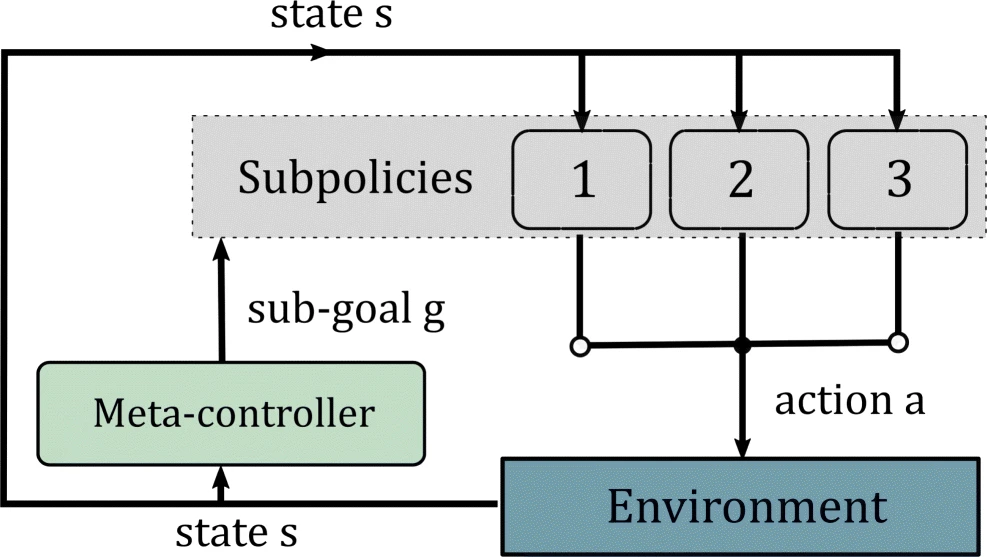
  <figcaption>Illustration of Hierarchical Reinforcement Learning (HRL), as shown in <a href="https://link.springer.com/article/10.1007/s10489-021-02726-3">(Bougie and Ichise, 2021)</a></figcaption>
</figure>

### Effective exploration
Despite how large the resultant action or state space ends up, it still should be as effectively explored as possible. Even small discrete spaces benefit from going beyond $\varepsilon$-greedy exploration, so there's no reason not to consider more effective exploration strategies. For example, Boltzmann exploration (see the extension activity of Notebook 2) provides graded preferences based on Q-values but is still reliant on a temperature schedule.

Beyond $\varepsilon$‑greedy and Boltzmann, you can let uncertainty itself guide exploration. Two classic examples are **Upper Confidence Bound** (UCB), which adds an "optimism bonus" to actions that have been tried less often, and **Thompson sampling** usually draws a fresh policy from an ensemble of value estimates so infrequently chosen moves get more chances.

You may want to consult some academic surveys for the latest methods in this direction, for example [Amin et. al., 2021](https://arxiv.org/abs/2109.00157) and [Hao et. al., 2021](https://arxiv.org/abs/2109.06668).

### Sparse Rewards

Many real-life problems are not able to assign any reward at each time step. In the worst case, a reward can only be assigned at the end of the episode. In Notebook 2, where we implemented Tabular Q-Learning, you might have noted that the *Temporal Difference* (TD) update is based on looking at one immediate step-ahead. This is clearly quite problematic, however, Q-learning can be adapted to have a $n$-step TD learning algorithm.

Beyond this, there are other ways to deal with sparse rewards. One key method is known as **reward-shaping**, where a heuristic is provided (or perhaps even learned) and combined with the real reward given at each time step. Specifically, **potential-based reward shaping**, where a heuristic function is defined for each state retains all convergence guarantees. Potential-based reward shaping can formally be defined as $r' = r +\gamma \varphi(s') - \varphi(s)$ where $\varphi$ is the potential function.  

There is also some synergy with hierarchical RL which was mentioned earlier, since for sub‑policies / sub‑goals, it can often be easier to define a reward function. 

Other approaches include **intrinsic motivation** (e.g. counting state novelty) to drive exploration; **Hindsight Experience Replay**, which relabels failed episodes with the goals that were actually achieved so that even "unsuccessful" rollouts provide positive learning signals; and **Align‑RUDDER**, which uses sequence alignment and contribution analysis to redistribute a delayed terminal reward back to the key earlier actions, effectively turning a sparse reward into a dense one.There are numerous academic surveys on the topic of sparse rewards, and it remains a dominant research area for RL.

### Implementation Details of Algorithms
Each algorithm is based on a theoretical foundation, but there are quite a few implementation details you will come across. For example, one of the state-of-the-art policy gradients, named **Proximal Policy Optimization** (PPO), has 37 implementation details [documented here](https://iclr-blog-track.github.io/2022/03/25/ppo-implementation-details/).

A great reference point of implementations is [CleanRL](https://github.com/vwxyzjn/cleanrl). Specifically, their implementations are one-file based and comment key details.

It's worth noting that testing your implementations in Machine Learning (ML) broadly is quite difficult. That's because unlike traditional software development, bugs do not cause immediately obvious erroneous behaviour such as wrongly processed input or a software crash. Machine Learning can easily fail silently, not working in the way you intended, perhaps even leaking data. However, if you can seed two implementations of algorithms, you should get very similar performance with the same hyperparameters and training length, aside from minor optimizations/differences.

## Optimality Guarantees using Reinforcement Learning
With combinatorial problems, there is the notion of **optimality**: a solution is considered the best (e.g. lowest cost or shortest time) among all feasible alternatives. Classical exact solvers such as branch‑and‑bound or dynamic programming can prove optimality by systematically exploring the search space and emitting certificates.

Reinforcement Learning is inherently an approximate approach: agents learn policies that often yield high‑quality solutions, but they rarely come with global optimality guarantees. While simple tabular settings admit convergence results, these depend on restrictive assumptions (e.g., a fully explored MDP and infinite interaction time). In contrast, PAC guarantees (Probably Approximately Correct) provide **theoretical sample‐complexity bounds**: with probability at least $1 - \delta$ (e.g., 95% or 99%), the algorithm will, after a finite number of samples, output a policy whose expected return is within $\varepsilon$ of optimal. However, this remains an approximate guarantee, although this is often enough for many real-life application domains, which when large enough also become intractable for exact solvers.

### Hybrid Methods
Traditional solvers and techniques, such as **Branch-and-Bound**, can be combined with RL in a fashion that retains exact optimality ([InstaDeep, 2023](https://instadeep.com/2023/02/exact-combinatorial-optimisation-with-deep-reinforcement-learning)), by **prioritising search order** using RL (as RL automatically learns heuristics).

Therefore, *RL can be used to learn intelligent heuristics that make exact algorithms faster or more scalable, while the backbone algorithm provides rigorous guarantees.* 

### Verifying Solutions and Certificates
An **exact solver** can also use a solution generated quickly from RL and try to improve it, and if it cannot, this verifies that the solution is optimal. This also provides a strong upper or lower bound  (depending if the objective is minimisation or maximisation) early in the solver's usage. Other RL techniques can still be used in the  combined with techniques that guide the search such as constraint propagation in constraint programming. This provides an ad-hoc **verifiably optimal solution**.

A more advanced notion is for the RL algorithm itself to produce a **certificate of quality** alongside its solution. For instance, an RL agent might simultaneously learn a **dual bound** — that is, a rigorously derived *lower bound on the optimal value* in a minimisation problem (and vice versa for a maximization problem). Comparing the solution’s cost to this bound tells you how far, at most, the solution could be from optimal.

# Further Resources
You can view some further resources as follows:
* For building your Reinforcement Learning knowledge:
    * [Mastering Reinforcement Learning](https://gibberblot.github.io/rl-notes/index.html#), which is a book accompanied by videos, providing an excellent overview of the various Reinforcement Learning methods out there
    * [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html), a seminal book with its latest edition published in 2018, by Richard S. Sutton and Andrew G. Barto. This book is considered foundational, and both authors heavily contributed to Reinforcement Learning research and helped start the field. However, this book is more on the theoretical side.
    * [Spinning Up in Deep RL by OpenAI](https://spinningup.openai.com/en/latest/), which provides a great overview of the state-of-the-art methods (e.g. PPO and actor-critic methods), particularly with deep reinforcement learning.
        * If you are not familiar with Deep Learning, consider looking at:
            * [Dive into Deep Learning](https://d2l.ai/), free online book, with code accompanying each section
            * [fast.ai courses](https://www.fast.ai/), covering advanced deep learning methods from the foundations accompanied by practical implementations
* Additional combinatorial environments are available at:
    * [Jumanji](https://github.com/instadeepai/jumanji)
    * [or-gym](https://github.com/hubbs5/or-gym), or stands for Operations Research 
* Interesting papers:
    *  [Pointer Networks](https://proceedings.neurips.cc/paper_files/paper/2015/file/29921001f2f04bd3baee84a12e98098f-Paper.pdf), used by some methods such as [AlphaStar](https://deepmind.google/discover/blog/alphastar-mastering-the-real-time-strategy-game-starcraft-ii/)
    * [Graph Reinforcement Learning for Combinatorial Optimization: A Survey and Unifying Perspective](https://arxiv.org/abs/2404.06492)